# Technical Report

## Introduction 

The objective of this technical report is to present an image classifier that can predict what a user is drawing based on the Google QuickDraw dataset. The classifier has been trained on the QuickDraw dataset, which is a collection of over 50 million drawings across 345 categories (this classifier features 20). The system uses a fastai vision learner to classify the user's input and provides the prediction in real-time. This report will cover the dataset, data preprocessing, model architecture, testing results, and the application.

## Dataset

The QuickDraw dataset consists of 50 million sketches across 345 categories, with each sketch being represented as a sequence of x, y coordinates. The dataset is publicly available, and each category is stored in multiple separate file types. For this model we used the numpy array format (https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap), which put each sketch's x and y coordinates into a 2D array, where each pixel corresponds to a position in the image. The images were then resized to 28 x 28 pixels and normalized to values between 0 and 1.

Example image:

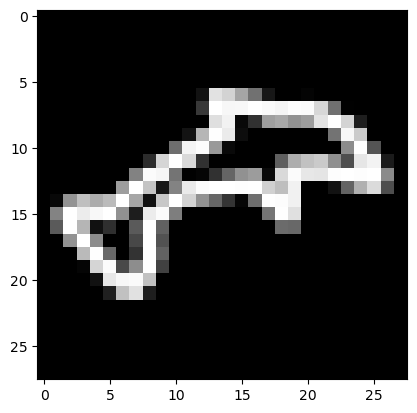

In [1]:
import numpy as np
import matplotlib.pyplot as plt

npy_drawings = np.load('/kaggle/input/dolphin/full_numpy_bitmap_dolphin.npy')
drawing1 = (npy_drawings[13]).reshape(28,28)
plt.imshow(drawing1, cmap='Greys_r');

## Data Processing

1000 photos from 20 different categories are randomly selected from the npy files, and then converted into pngs for size and storage. We then label each image, storing them in a dataloader, with an 80:20 testing to validation set respectably, resting in 16,000 training images and 4,000 validation images.

## Model Architecture

The image classifier was built with a fastai vision_learner using the resnet34 architecture. The input to the model is a grayscale image of size 28 x 28 pixels, and the output is a probability distribution across the 20 possible categories. 

## Training and Testing

The model was trained on the preprocessed dataset for 20 epochs. During training, the model was evaluated on the validation set after each epoch to monitor the loss and accuracy. The model achieved a training loss of 0.058360 and a validation loss of 0.541575, with a total accuracy of 88%.

To test the model, a web application was developed that allows the user to draw an image using the mouse, which is then classified by the model in real-time. The application takes the user's drawing and converts it to a 28 x 28 grayscale image, where the model predicts the category with the highest probability. The prediction is then returned to the frontend, where it is displayed to the user, along with the probabilites of every possible category.

## App Implementation

The web application was built and deployed using streamlit (hosted at https://samhoog-art-ificialin-applicationart-ificialintelligence-qh6rsf.streamlit.app). It uses a streamlit drawing canvas API, and imports the classifier using fastai's built in import and export functionality. The model's guess is displayed at the bottom of the screen, with the sidebar featuring some drawing customization as well as the full vector of the probability of each of the 20 categories, which also updates in real time whenever the mouse button is released.

## Analysis

Qualitatively, the model can confidentally recognize all 20 categories with the whiteboard. Some categories are much stronger than others, for example the classifier struggles between animals, as a monkey and a panda are much closer to each other than a mug and shorts. Furthermore, the applications compression of the drawn image to 28x28 pixels can result in the user's drawing getting cluttered and nonsensical. Small and intricate details will get lost, but if you draw large and generally the classifier almost always gets the right answer.

A possible problem with this model could be the dataset itself: with the Google QuickDraw dataset downloading any user submitted drawings, it's possible to get bad drawings or even drawings that are innapropriate or purposely trying to work against the prompt. However, by taking 1000 random images of each category, it should be enough to get a good idea of what each category is.

## Conclusion

In conclusion, this report covers an image classifier that can predict what a user is drawing based on the Google QuickDraw dataset. The model achieved an accuracy of 88% on the validation set, indicating that it can classify images accurately. The web application developed using this model provides a simple and intuitive way for users to interact with the system and receive real-time predictions. Future work could involve improving the model's performance on specific categories and expanding the dataset to include more categories, either manually or by looking at feature vectors.